In [46]:
# import libraries
import matplotlib.pyplot as plt
%matplotlib inline
print('Successfully imported the matplotlib library.')

Successfully imported the matplotlib library.


In [47]:
import requests
import pandas as pd
#import plotly.express as px
print('Libraries imported')

Libraries imported


In [48]:
url = 'https://health.canada.ca/apps/open-data/radon-concentrations/radon-concentration.csv'
dfs = pd.read_csv(url,   encoding='latin1',    delimiter=',')
dfs.head()

,ResultNumber,ProvinceTerritory,Health Region2007,HealthRegionCode2007,ForwardSortationAreaCodes,TestDurationInDays,AverageRadonConcentrationInBqPerM3,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1.0,NL,Eastern Regional Integrated Health Authority,1011.0,A0A,127.0,20,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NL,Eastern Regional Integrated Health Authority,1011.0,A0A,108.0,36,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NL,Eastern Regional Integrated Health Authority,1011.0,A0E,91.0,<15,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NL,Eastern Regional Integrated Health Authority,1011.0,A0A,91.0,31,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NL,Eastern Regional Integrated Health Authority,1011.0,A0C,98.0,26,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
dfs.describe()

,TestDurationInDays
count,13814.000000
mean,96.680469
std,14.612814
min,30.000000
25%,91.000000
50%,92.000000
75%,98.000000
max,456.000000


In [50]:
dfs.shape

(13815, 13)

ResultNumber is not relevant, so we removed it


In [51]:
dfs = dfs.drop(['ResultNumber'], axis=1)

In [54]:
dfs.isnull().sum()

ProvinceTerritory                     1
Health Region2007                     1
HealthRegionCode2007                  1
ForwardSortationAreaCodes             1
TestDurationInDays                    1
AverageRadonConcentrationInBqPerM3    1
dtype: int64

All missing data is in the Unnames Columns, so we drop these

In [55]:
dfs.dropna(axis = 1, how = 'all', inplace = True)

Now we checking for rows with missing data and drop them

In [56]:
dfs[dfs.isnull().any(axis = 1)]

,ProvinceTerritory,Health Region2007,HealthRegionCode2007,ForwardSortationAreaCodes,TestDurationInDays,AverageRadonConcentrationInBqPerM3
13814,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
dfs.isnull().sum()

ProvinceTerritory                     1
Health Region2007                     1
HealthRegionCode2007                  1
ForwardSortationAreaCodes             1
TestDurationInDays                    1
AverageRadonConcentrationInBqPerM3    1
dtype: int64

In [59]:
dfs.dropna(inplace = True)

Final check to ensure the dataframe has no missing data

In [97]:
dfs.isna().sum().sum()

0

In [98]:
dfs.head()

,ProvinceTerritory,Health Region2007,ForwardSortationAreaCodes,TestDurationInDays,AverageRadonConcentrationInBqPerM3
0,NL,Eastern Regional Integrated Health Authority,A0A,127.0,20
1,NL,Eastern Regional Integrated Health Authority,A0A,108.0,36
2,NL,Eastern Regional Integrated Health Authority,A0E,91.0,<15
3,NL,Eastern Regional Integrated Health Authority,A0A,91.0,31
4,NL,Eastern Regional Integrated Health Authority,A0C,98.0,26


We check the relation between the columns Health Region 2007 and Health ReigionCode 2007>

In [99]:
(dfs.groupby(['Health Region2007'])['HealthRegionCode2007'].unique().value_counts()>1).sum()

KeyError: 'Column not found: HealthRegionCode2007'

In [100]:
dfs.groupby(['HealthRegionCode2007']).mean()

KeyError: 'HealthRegionCode2007'

look at the mean group by Province and Territory

In [105]:
dfs.groupby(['ProvinceTerritory']).mean()

,TestDurationInDays,AverageRadonConcentrationInBqPerM3
ProvinceTerritory,,
AB,96.977032,91.744258
BC,95.558063,68.280958
MB,95.329670,149.882925
NB,97.014440,178.970517
NL,97.495091,60.903226
NS,97.462838,92.976351
NT,95.140541,69.381081
NU,99.948718,9.903846
ON,97.170460,82.335104


In [87]:
dfs_territory.head()

,ProvinceTerritory,Health Region2007,ForwardSortationAreaCodes,TestDurationInDays,AverageRadonConcentrationInBqPerM3
0,NL,Eastern Regional Integrated Health Authority,A0A,127.0,20
1,NL,Eastern Regional Integrated Health Authority,A0A,108.0,36
2,NL,Eastern Regional Integrated Health Authority,A0E,91.0,<15
3,NL,Eastern Regional Integrated Health Authority,A0A,91.0,31
4,NL,Eastern Regional Integrated Health Authority,A0C,98.0,26
713,PE,Prince Edward Island Health Region,C0B,92.0,<15
714,PE,Prince Edward Island Health Region,C0B,96.0,22
715,PE,Prince Edward Island Health Region,C0A,91.0,<15
716,PE,Prince Edward Island Health Region,C0B,92.0,140
717,PE,Prince Edward Island Health Region,C0A,98.0,<15


In [102]:
dfs.dtypes

ProvinceTerritory                      object
Health Region2007                      object
ForwardSortationAreaCodes              object
TestDurationInDays                    float64
AverageRadonConcentrationInBqPerM3     object
dtype: object

In [103]:
dfs[dfs['AverageRadonConcentrationInBqPerM3'].apply(lambda x: not x.isnumeric())]['AverageRadonConcentrationInBqPerM3'].value_counts()

<15    2585
Name: AverageRadonConcentrationInBqPerM3, dtype: int64

In [104]:
dfs['AverageRadonConcentrationInBqPerM3'].replace('<15', 7.5, inplace=True)
dfs['AverageRadonConcentrationInBqPerM3'] = dfs['AverageRadonConcentrationInBqPerM3'].astype('float64')

final checking the data sets

In [106]:
dfs.dtypes

ProvinceTerritory                      object
Health Region2007                      object
ForwardSortationAreaCodes              object
TestDurationInDays                    float64
AverageRadonConcentrationInBqPerM3    float64
dtype: object

In [114]:
dfs.head()

,ProvinceTerritory,Health Region2007,ForwardSortationAreaCodes,TestDurationInDays,AverageRadonConcentrationInBqPerM3
0,NL,Eastern Regional Integrated Health Authority,A0A,127.0,20.0
1,NL,Eastern Regional Integrated Health Authority,A0A,108.0,36.0
2,NL,Eastern Regional Integrated Health Authority,A0E,91.0,7.5
3,NL,Eastern Regional Integrated Health Authority,A0A,91.0,31.0
4,NL,Eastern Regional Integrated Health Authority,A0C,98.0,26.0


In [110]:
dfs.describe()

,TestDurationInDays,AverageRadonConcentrationInBqPerM3
count,13814.000000,13814.000000
mean,96.680469,96.434451
std,14.612814,170.463366
min,30.000000,7.500000
25%,91.000000,19.000000
50%,92.000000,47.000000
75%,98.000000,114.000000
max,456.000000,5657.000000


Text(0.5,0,'Province')

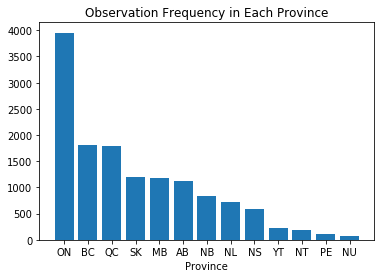

In [111]:
import matplotlib.pyplot as plt
province = dfs['ProvinceTerritory'].value_counts()
plt.bar(province.index, province.values)
plt.title("Observation Frequency in Each Province")
plt.xlabel("Province")

Most oberservations are in ON, BC, and Quebec.

Text(0.5,0,'Days')

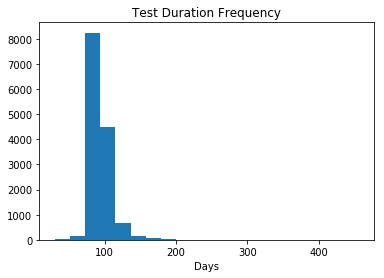

In [116]:
plt.hist(dfs['TestDurationInDays'], bins=20)
plt.title("Test Duration Frequency")
plt.xlabel("Days")

Text(0.5,0,'Province')

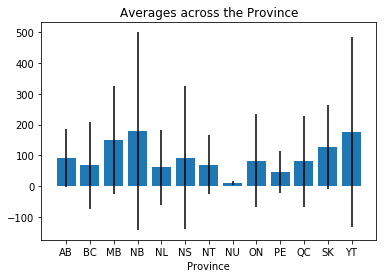

In [113]:
average_concentration = dfs.groupby(['ProvinceTerritory'])['AverageRadonConcentrationInBqPerM3'].mean()
std_concentration =  dfs.groupby(['ProvinceTerritory'])['AverageRadonConcentrationInBqPerM3'].std()
plt.bar(average_concentration.index, average_concentration.values, yerr=std_concentration)
plt.title("Averages across the Province")
plt.xlabel("Province")